In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Load the MNIST dataset from Keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print("Training samples", len(X_train))
print("Test samples", len(X_test))

print("Shape of individual images:", X_train[0].shape)

Training samples 60000
Test samples 10000
Shape of individual images: (28, 28)


In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

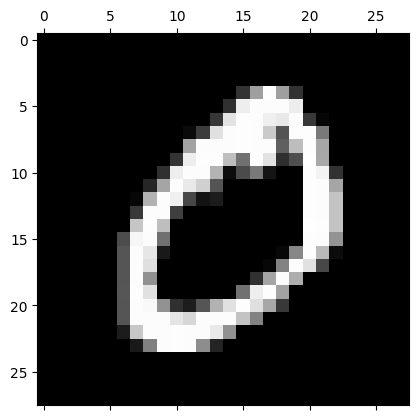

In [8]:
plt.matshow(X_train[1], cmap='gray')

In [7]:
y_train[1]

0

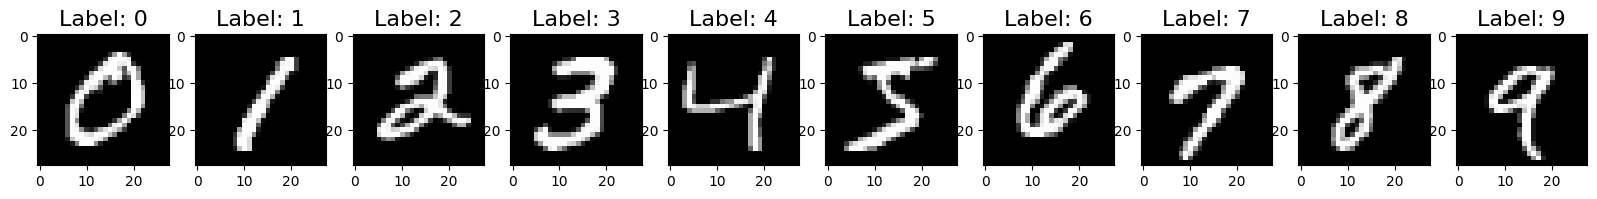

In [9]:
num_classes = 10
_, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap='gray')
    ax[i].set_title(f'Label: {i}', fontsize=16)

In [10]:
X_train.shape

(60000, 28, 28)

## Scaling Pixel Values

We scale the pixel values to the range [0,1] for several reasons. Neural networks typically perform better with input data that is on a smaller scale. This helps in speeding up the training process since smaller values make the weight adjustments in the optimization algorithm less extreme. It also helps in preventing the model from getting stuck in local minima during training. Furthermore, scaling ensures that all input features (pixel values in this case) contribute equally to the distance computations in the learning process, thus avoiding bias towards featuring with larger scales.

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
for r in X_train[2]:
    for c in r:
        if c>0:
            print(c)


0.2627450980392157
0.9098039215686274
0.15294117647058825
0.24313725490196078
0.3176470588235294
0.47058823529411764
0.7058823529411765
0.15294117647058825
0.49411764705882355
0.6392156862745098
0.00784313725490196
0.6
0.8235294117647058
0.1568627450980392
0.8627450980392157
0.6392156862745098
0.10588235294117647
0.996078431372549
0.6352941176470588
0.8705882352941177
0.6392156862745098
0.7176470588235294
0.996078431372549
0.49019607843137253
0.1803921568627451
0.9607843137254902
0.6392156862745098
0.7764705882352941
0.996078431372549
0.2196078431372549
0.47058823529411764
0.996078431372549
0.6392156862745098
0.09019607843137255
0.9058823529411765
0.996078431372549
0.11372549019607843
0.6235294117647059
0.996078431372549
0.47058823529411764
0.6392156862745098
0.996078431372549
0.8470588235294118
0.06274509803921569
0.6235294117647059
0.996078431372549
0.2627450980392157
0.054901960784313725
0.33725490196078434
0.6980392156862745
0.9725490196078431
0.996078431372549
0.3568627450980392
0

## Flattening Images to 1D Arrays
In many machine learning models, including simple neural networks, the input data needs to be a flat vector of features. By converting the 2D image matrices into 1D arrays, we tranform the data into a format that neural network can work with. This is because the underlaying algorithms typically expect a single list of features for each input sample, and each pixle value in the image is treated as a separate feature. This step is essential for the model to process the input image data correctly.

In [13]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)



In [14]:
print(X_train.shape)
print(X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


## Create an inital Neural Network using Keras

We will initially use a simple network that only has an input layer and an output layer. The input layer will have 784 neurons (28x28 pixels) and the output layer will have 10 neurons as we want to predict a digit, 0 -9

In [15]:
model = keras.Sequential(
    [
        keras.layers.Dense(10, input_shape=(784,), activation= 'softmax')
    ]
)

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train_flattened, y_train, epochs=5)



Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4728 - accuracy: 0.8750
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3040 - accuracy: 0.9155
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2833 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2661 - accuracy: 0.9255


In [16]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 995us/step


In [17]:
y_predicted[1]

array([5.1620242e-04, 4.7965859e-06, 9.9230415e-01, 2.1305558e-04,
       4.3314180e-13, 3.0974301e-03, 3.7674212e-03, 3.6399150e-16,
       9.6890144e-05, 7.6406432e-13], dtype=float32)

In [18]:
np.argmax(y_predicted[1])

2

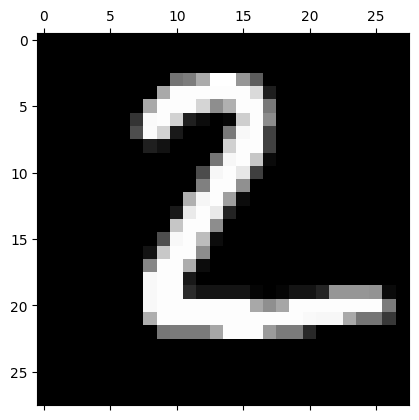

In [19]:
plt.matshow(X_test[1], cmap='gray')

In [20]:
y_test[1]

2

In [21]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [22]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
# Check against the first 10 labels
print(y_predicted_labels[:10])
print(', '. join([str(c) for c in y_test[:10]]))

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]
7, 2, 1, 0, 4, 1, 4, 9, 5, 9


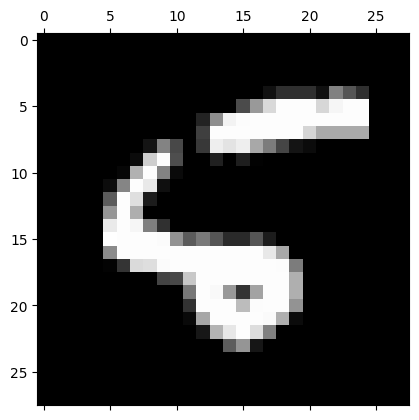

In [24]:
plt.matshow(X_test[8], cmap='gray')

Create a confusion matrix to see how well the model performed.

In [25]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [26]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 967,    0,    1,    2,    0,    5,    2,    2,    1,    0],
       [   0, 1112,    4,    1,    0,    1,    4,    2,   11,    0],
       [   7,    8,  949,   13,    8,    3,   12,    8,   19,    5],
       [   6,    0,   27,  907,    1,   29,    2,    9,   19,   10],
       [   2,    1,    6,    0,  915,    0,    8,    3,   10,   37],
       [  11,    3,    6,   23,    9,  792,    9,    5,   26,    8],
       [  15,    3,    9,    1,    8,   23,  895,    2,    2,    0],
       [   1,    5,   31,    4,    9,    1,    0,  933,    2,   42],
       [  12,    8,   11,   15,    9,   32,    9,    9,  855,   14],
       [  11,    7,    1,    7,   26,    8,    0,   13,    5,  931]])>

Text(95.72222222222221, 0.5, 'Truth')

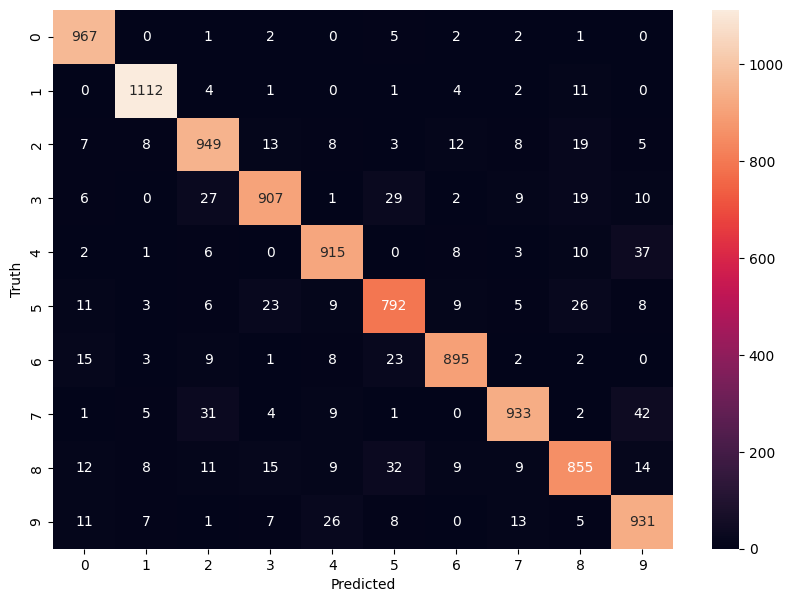

In [27]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [28]:
errors = (y_predicted_labels - y_test != 0)
errors

array([False, False, False, ..., False, False, False])

In [29]:
y_error_indexes = [i for i, error in enumerate(errors) if error]
len(y_error_indexes)

744

# Check a few random predictions

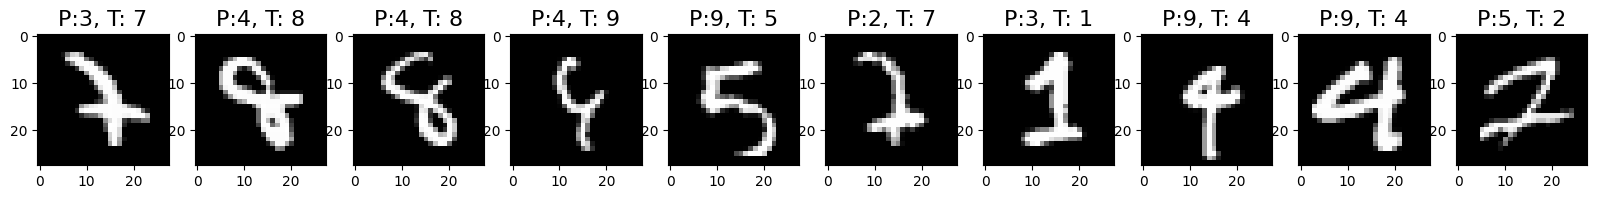

In [30]:
import random

idx_to_check = [y_error_indexes[random.randint(0, len(y_error_indexes)-1)] for _ in range(10)]

num_classes = 10

_, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i, idx in enumerate(idx_to_check):
    sample = X_test[idx]
    predicted_value = y_predicted_labels[idx]
    true_value = y_test[idx]
    ax[i].imshow(sample,cmap='gray')
    ax[i].set_title(f'P:{predicted_value}, T: {true_value}', fontsize=16)

Add a hidden layer to our model and see if it improves the eccuracy. Change epochs from 5 to 10.

In [31]:
model2 = keras.Sequential(
    [
        keras.layers.Dense(200, input_shape=(784,), activation= 'relu'),
        keras.layers.Dense(10, input_shape=(784,), activation= 'softmax')

    ]
)

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train_flattened, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2352 - accuracy: 0.9321
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1003 - accuracy: 0.9703
Epoch 3/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0662 - accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0486 - accuracy: 0.9854
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0355 - accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0281 - accuracy: 0.9908
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0205 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0175 - accuracy: 0.9944
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0134 - accuracy: 0.9956
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.013

In [32]:
y_predicted2 = model2.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [33]:
y_predicted_labels2 = [np.argmax(i) for i in y_predicted2]

In [34]:
cm2 = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels2)

Text(95.72222222222221, 0.5, 'Truth')

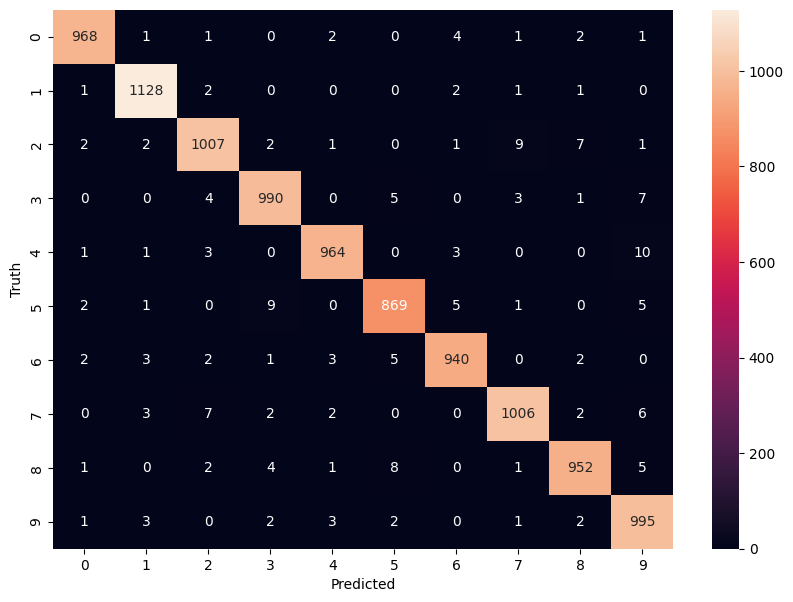

In [35]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm2, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [36]:
errors2 = (y_predicted_labels2 - y_test != 0)
y_error_indexes2 = [i for i, error in enumerate(errors2) if error]
len(y_error_indexes2)

181